# Homework Assignment 3

Using the [Seattle Library Collection Inventory Dataset](https://www.kaggle.com/city-of-seattle/seattle-library-collection-inventory#library-collection-inventory.csv) and TuriCreate please, answer the following questions:

In [1]:
# improts for the Assignment.
import turicreate as tc
import turicreate.aggregate as agg
import re
import os
import numpy as np
import pandas as pd
import json 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (26,9)

**Question 1:** Write a function that returns the most popular book in each subject. Use it to find the most popular book in
    the _Mystery Fiction_ subject (15pt)

In [5]:
sf = tc.SFrame.read_csv("datasets/library-collection-inventory.csv")

Finished parsing file /home/ise/Desktop/datasets/library-collection-inventory.csv

Parsing completed. Parsed 100 lines in 2.87843 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 159974 lines. Lines per second: 79191.4

Read 1117363 lines. Lines per second: 153625

Read 2075452 lines. Lines per second: 167677

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-11-01 ... :00:00.000
	9: 6

Read 3034525 lines. Lines per second: 171183

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-11-01 ... :00:00.000
	9: 6

Read 3832496 lines. Lines per second: 168280

Read 4631080 lines. Lines per second: 166060

Read 5429098 lines. Lines per second: 160113

Read 6227601 lines. Lines per second: 160390

Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 1

Read 7026491 lines. Lines per second: 159189

Read 7823429 lines. Lines per second: 158023

Read 8462123 lines. Lines per second: 154866

Successfully parsed 9 tokens: 
	0: 362786
	1: [Records., ... l Society]
	2: Registers  ... astchester
	3: arbk
	4: caref
	5: 
	6: cen
	7: 2017-09-01 ... :00:00.000
	8: 1

Read 9260562 lines. Lines per second: 152536

Read 10059091 lines. Lines per second: 151949

Read 10857187 lines. Lines per second: 151593

Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-11-01 ... :00:00.000
	9: 1

Read 11656432 lines. Lines per second: 150537

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 6

Read 12454552 lines. Lines per second: 149706

Read 12773640 lines. Lines per second: 135540

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 6

Read 13412198 lines. Lines per second: 132417

Read 13732034 lines. Lines per second: 128836

Read 13891995 lines. Lines per second: 117827

Read 14211283 lines. Lines per second: 111502

Read 14530404 lines. Lines per second: 107543

Read 15168504 lines. Lines per second: 108011

Read 15966786 lines. Lines per second: 109649

Read 16765254 lines. Lines per second: 111184

Read 17563545 lines. Lines per second: 112072

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 6

Read 18201855 lines. Lines per second: 112476

Read 18840182 lines. Lines per second: 111813

Read 19478545 lines. Lines per second: 111797

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 6

Read 20117130 lines. Lines per second: 112210

Successfully parsed 10 tokens: 
	0: 28078
	1: [Papers.," ... 9)",,1969]
	2: 
	3: Genealogy Congresses
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-10-01 ... :00:00.000
	9: 6

Read 20755497 lines. Lines per second: 112563

Read 21553911 lines. Lines per second: 113170

Read 22351192 lines. Lines per second: 113003

11 lines failed to parse correctly

Finished parsing file /home/ise/Desktop/datasets/library-collection-inventory.csv

Parsing completed. Parsed 22839622 lines in 201.941 secs.

In [7]:
sf

BibNum,Title,Author,ISBN,PublicationYear
1988429,Net shore-drift inWashington State. Vol ...,,,[1991]
2935880,If I built a house /Chris Van Dusen. ...,"Van Dusen, Chris","0803737513, 9780803737518",[2012]
3304258,Mechanical failure / JoeZieja. ...,"Zieja, Joseph","1481459260, 1481459279,9781481459266, ...",[2016]
2875471,I said no! : a kid-to-kidguide to keeping private ...,"King, Zack","1878076493, 9781878076496",2012.
2603064,The Mercy Watsoncollection. Volume 3 / ...,"DiCamillo, Kate","0739360507, 9780739360507",[2009]
3092470,Gill Landry.,"Landry, Gill",,[2015]
2636767,Managing off-site stafffor small business / Lin ...,"Grensing-Pophal, Lin,1959- ...","155180865X, 9781551808659",2010.
1939993,Encyclopedia ofhistorians and histor ...,,1884964338,1999.
3083198,The Regal years(1997-2004) / the Beta ...,Beta Band,,[2013]
2496963,"Dinosaurios con plumas /por ""Dino"" Don Lessem ; ...","Lessem, Don","0822562421, 9780822562429",[2007]


In [8]:
r = re.compile('\\d{4}')
def get_year(y_str): # clean non-year like cells
    l = r.findall(y_str) # take the first year
    if len(l) == 0:
        return None
    return int(l[0])

sf['subject_list'] = sf['Subjects'].apply(lambda l: [subject.strip().lower() for subject in l.split(",")])
sf = sf.remove_column('Subjects')
sf = sf.stack("subject_list", new_column_name="subject")
sf['year'] = sf['PublicationYear'].apply(lambda s: get_year(s)) 
sf

BibNum,Title,Author,ISBN,PublicationYear
1988429,Net shore-drift inWashington State. Vol ...,,,[1991]
1988429,Net shore-drift inWashington State. Vol ...,,,[1991]
1988429,Net shore-drift inWashington State. Vol ...,,,[1991]
1988429,Net shore-drift inWashington State. Vol ...,,,[1991]
1988429,Net shore-drift inWashington State. Vol ...,,,[1991]
1988429,Net shore-drift inWashington State. Vol ...,,,[1991]
1988429,Net shore-drift inWashington State. Vol ...,,,[1991]
1988429,Net shore-drift inWashington State. Vol ...,,,[1991]
2935880,If I built a house /Chris Van Dusen. ...,"Van Dusen, Chris","0803737513, 9780803737518",[2012]
2935880,If I built a house /Chris Van Dusen. ...,"Van Dusen, Chris","0803737513, 9780803737518",[2012]


In [10]:
def most_popular_book_for_subject(subject):
    subject = subject.lower()
    sf2 = sf['Title', 'subject', 'ItemCount']
    g = sf2.groupby(['Title', 'subject'],{'Count': agg.SUM('ItemCount')})
    g2 = g.groupby(key_column_names='subject', operations={'max_count': agg.ARGMAX('Count', 'Title')})
    a = g2[g2['subject'] == subject]['max_count']
    a.materialize()
    print(f"The most popular book in the subject Mystery Fiction is{a[0]})
most_popular_book_for_subject('Mystery Fiction')

The most popular book in the subject Mystery Fiction is The woman in cabin 10 / Ruth Ware.


**Question 2**: Find the top-10 fiction subjects (5pt), and use Seaborn to visualize the number of items over time for each subject (15pt)
    

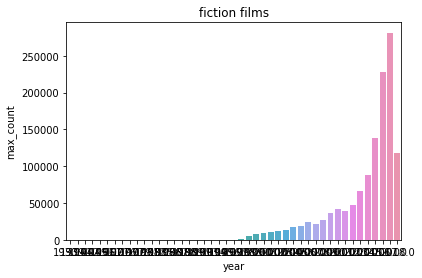

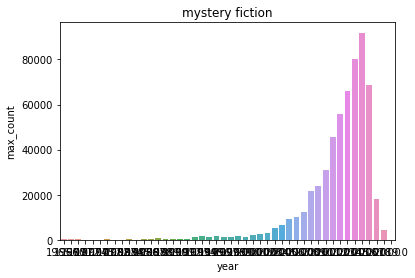

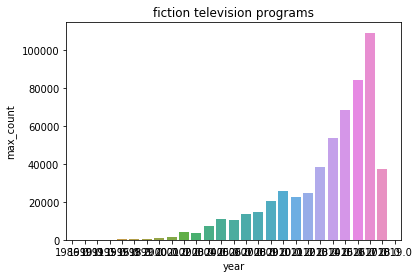

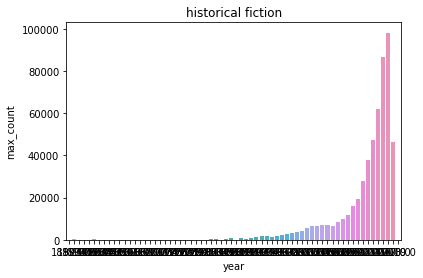

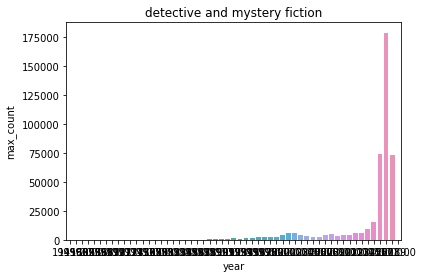

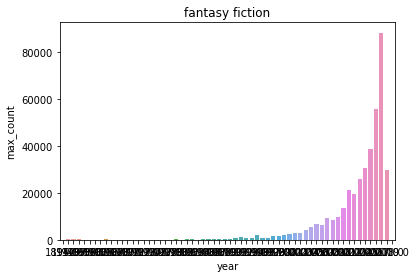

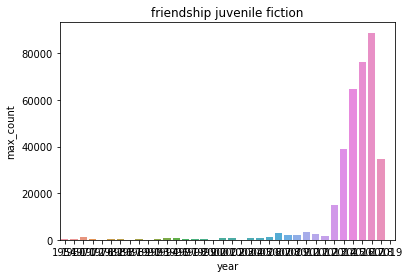

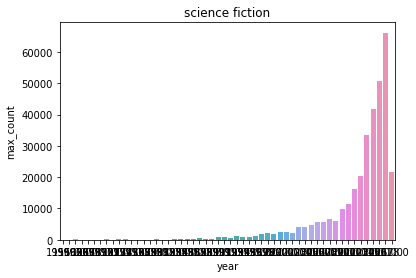

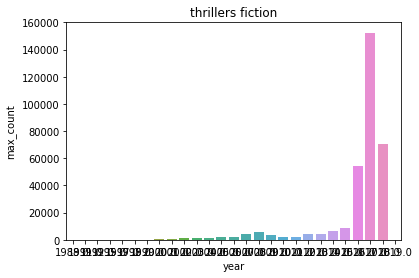

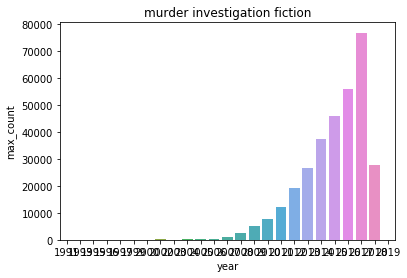

In [11]:
sf2 = sf['subject', 'year', 'ItemCount'] 
g = sf2.groupby('subject', {'max_count': agg.SUM('ItemCount')}).sort("max_count", ascending=False)
g = g[g['subject'].apply(lambda s: 'fiction' in s.split(" "))]
top_10_sub = g['subject'][:10] 
for subject in top_10_sub:
    plt.xticks(rotation=45)
    curr_sub_sf = sf2[sf2['subject'] == subject]
    g = curr_sub_sf.groupby(['subject', 'year'], {'max_count': agg.SUM('ItemCount')}).sort("year").to_dataframe()
    ax = sns.barplot(x="year", y="max_count", data=g)
    ax.set_title(subject)
    plt.show()

**Question 3:** Write a function that gets as input a subject name. The function returns the most _popular_ author for the input subject (15pt).



In [12]:
def most_popular_author_for_subject(subject_name):
    sf2 = sf['subject', 'ItemCount', 'Author']
    sf2 = sf2[sf2['subject'] == subject_name.lower()]
    ans = sf2.groupby('Author', {'max_count': agg.SUM('ItemCount')}).sort('max_count', ascending=0)[0]['Author']
    print(f"The most popular author for the subject {subject_name} is {ans}")
    
most_popular_author_for_subject('Mystery Fiction')


The most popular author for the subject Mystery Fiction is Christie, Agatha, 1890-1976


Using the [The Blog Authorship Corpus](http://u.cs.biu.ac.il/~koppel/BlogCorpus.htm) and TuriCreate, please answer the following questions:

**Question 4:** Calculate the average and median age of bloggers in each topic (5pt). 
Calculate the average and median age of bloggers according to their sign (5pt). 
Visualize the age distributions  of bloggers according to their  topic and gender (15pt)

In [14]:
blogger_dir = "datasets/blogs"


#We create a short code which parse the XML and convert it to JSON files - taken from lecture
def get_posts_from_file(file_name):
    posts_dict = {}
    txt = open(file_name, "r",  encoding="utf8", errors='ignore').read()
    txt = txt.replace("&nbsp;", " ")
    for p in txt.split("</post>"):
        if "<post>" not in p or "<date>" not in p:
            continue
        post = p.split("<post>")[1].strip()
        dt = p.split("</date>")[0].split("<date>")[1].strip()
        posts_dict[dt] = post

    return posts_dict
            

def blogger_xml_to_json(file_name):
    l = file_name.split("/")[-1].split(".")
    if len(l) != 6:
        raise Exception("Could not analyze file f{file_name} - Length %s" % len(l) )
    j = {"id": l[0], "gender": l[1], "age":int(l[2]), "topic":l[3], "sign": l[4], "posts": get_posts_from_file(file_name)}
    return j

# converting all the XMLs to a single large JSON file
all_jsons = []
for p in os.listdir(blogger_dir):
    if not p.endswith(".xml"):
        continue
    j = blogger_xml_to_json(f"{blogger_dir}/" + p)
    all_jsons.append(j)
json.dump(all_jsons, open(f"datasets/json/all_bloggers.json","w" ))

In [40]:
sf = tc.SFrame.read_json(f"datasets/json/all_bloggers.json") 

Parsing JSON records from /home/ise/Desktop/datasets/json/all_bloggers.json

Successfully parsed 19320 elements from the JSON file /home/ise/Desktop/datasets/json/all_bloggers.json

part 1

In [17]:

# topics
g1 = sf.groupby('topic', {'average_age': agg.MEAN('age')})
g2 = sf.groupby('topic', {'median_age': agg.QUANTILE('age', 0.5)})
g2['median_age'] = g2['median_age'].apply(lambda x: x[0])
g1['median_age'] = g2['median_age']
df = pd.melt(g1.to_dataframe(), id_vars=['topic']).sort_values(['variable','value'])

# signs
g3 = sf.groupby('sign', {'average_age': agg.MEAN('age')})
g4 = sf.groupby('sign', {'median_age': agg.QUANTILE('age', 0.5)})
g4['median_age'] = g4['median_age'].apply(lambda x: x[0])
g3['median_age'] = g4['median_age'] 
df2 = pd.melt(g3.to_dataframe(), id_vars=['sign']).sort_values(['variable','value'])





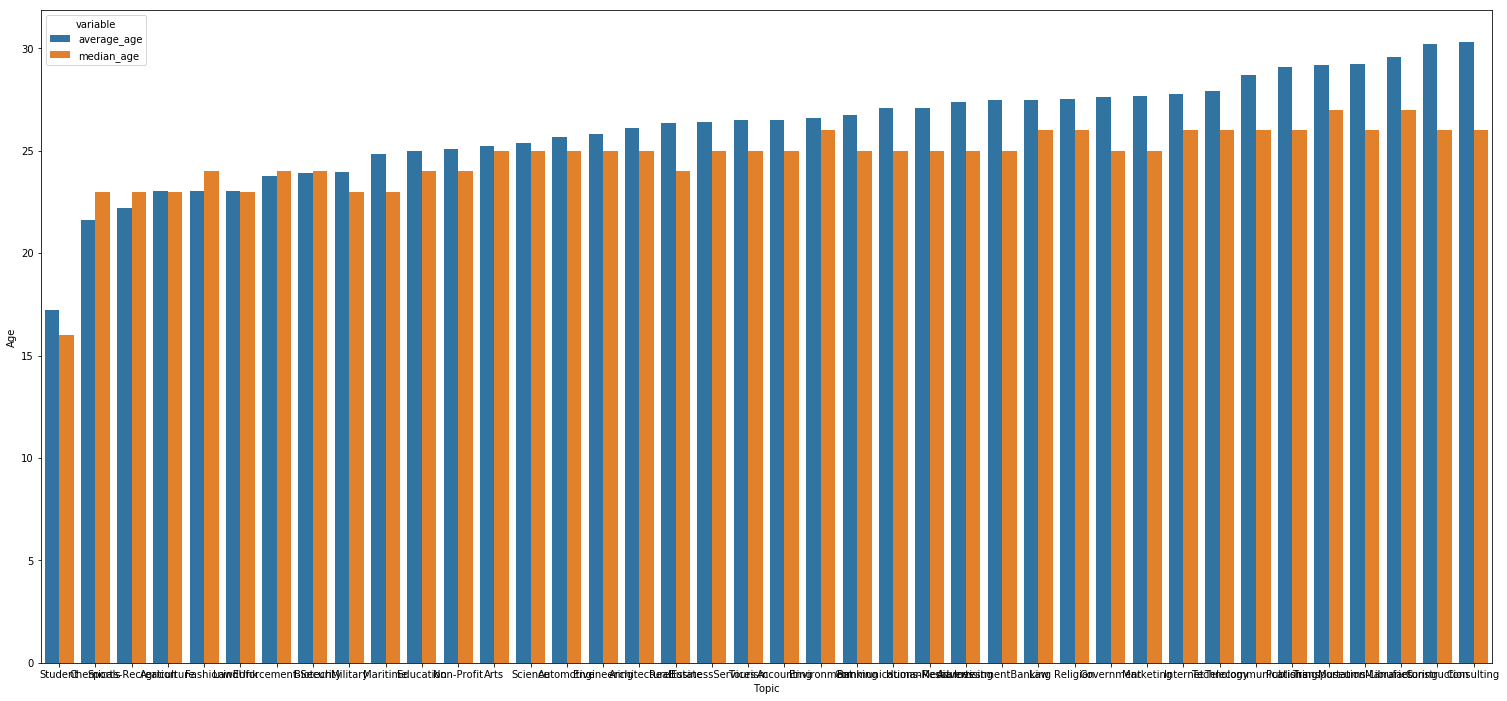

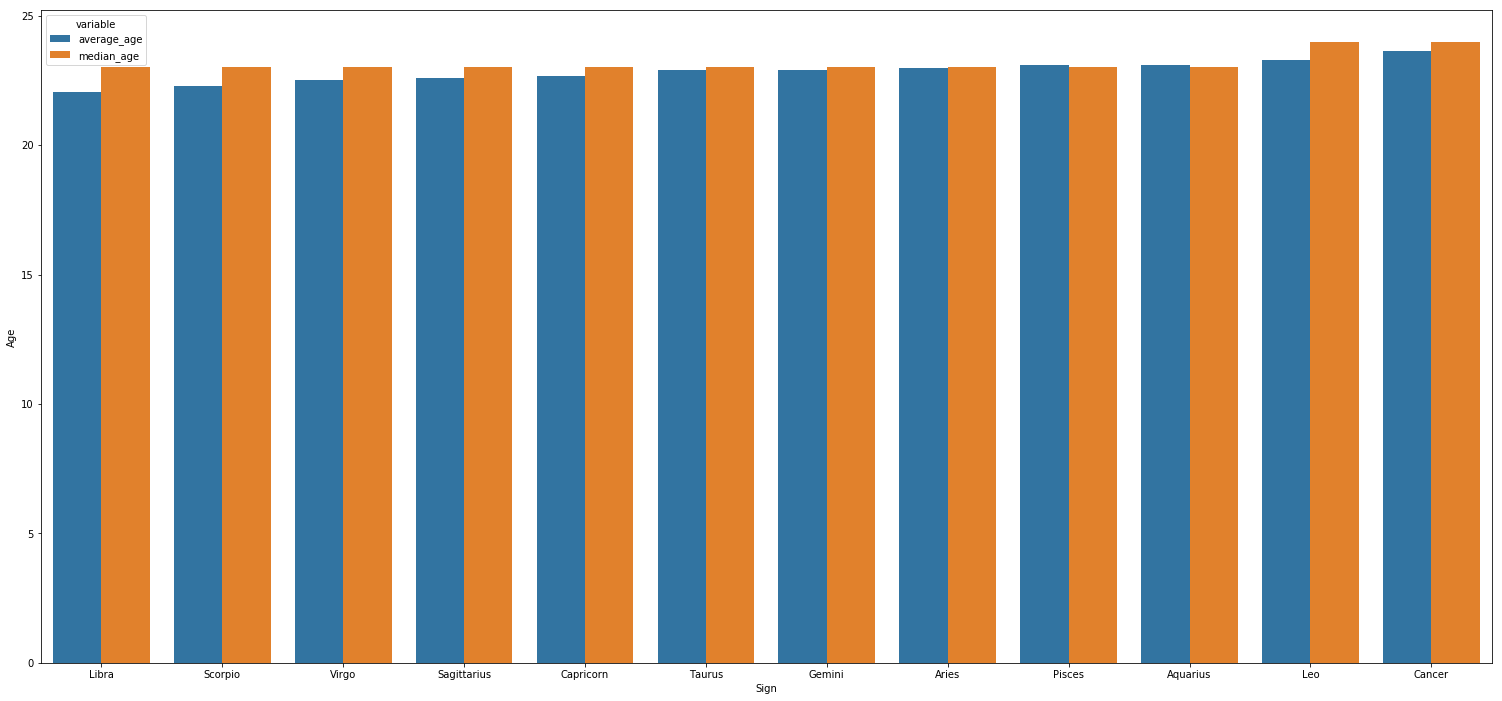

In [18]:
#plot
g = sns.barplot(x="topic", y="value", hue="variable", data=df)
g.set(xlabel='Topic', ylabel='Age')
plt.gcf().set_size_inches(26, 12)
plt.show()
g = sns.barplot(x="sign", y="value", hue="variable", data=df2)
g.set(xlabel='Sign', ylabel='Age')
plt.gcf().set_size_inches(26, 12)
plt.show()

part 2

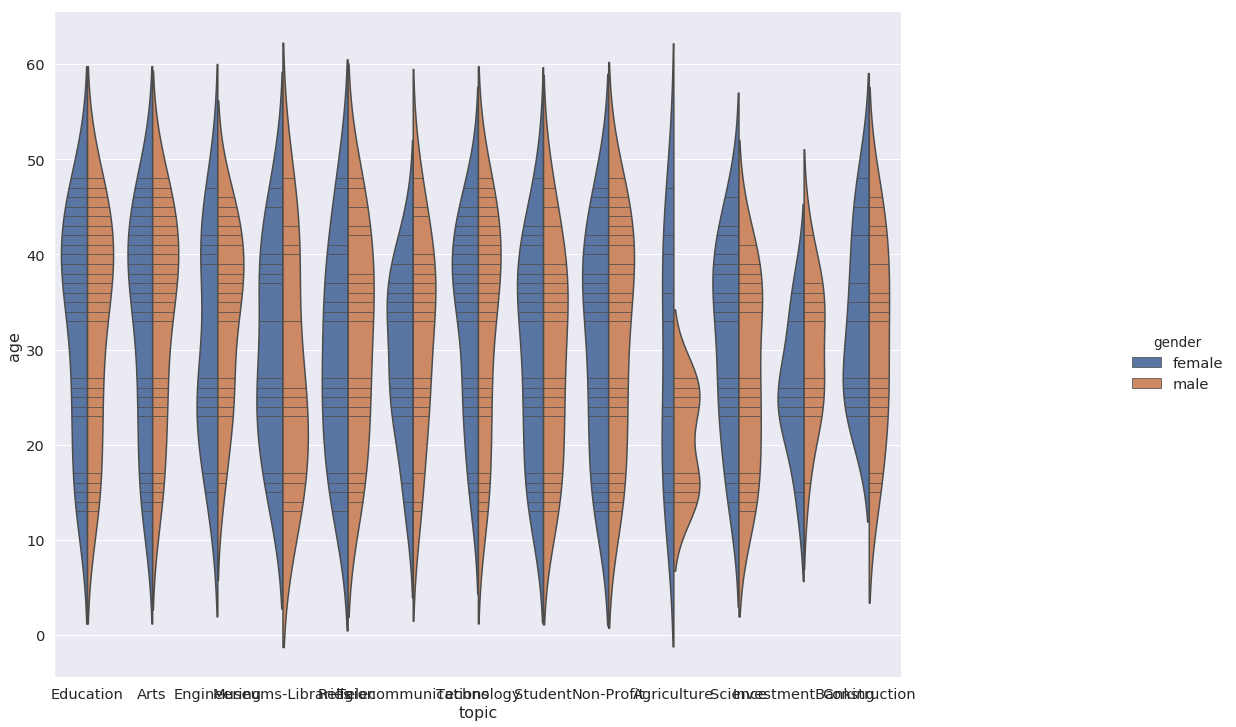

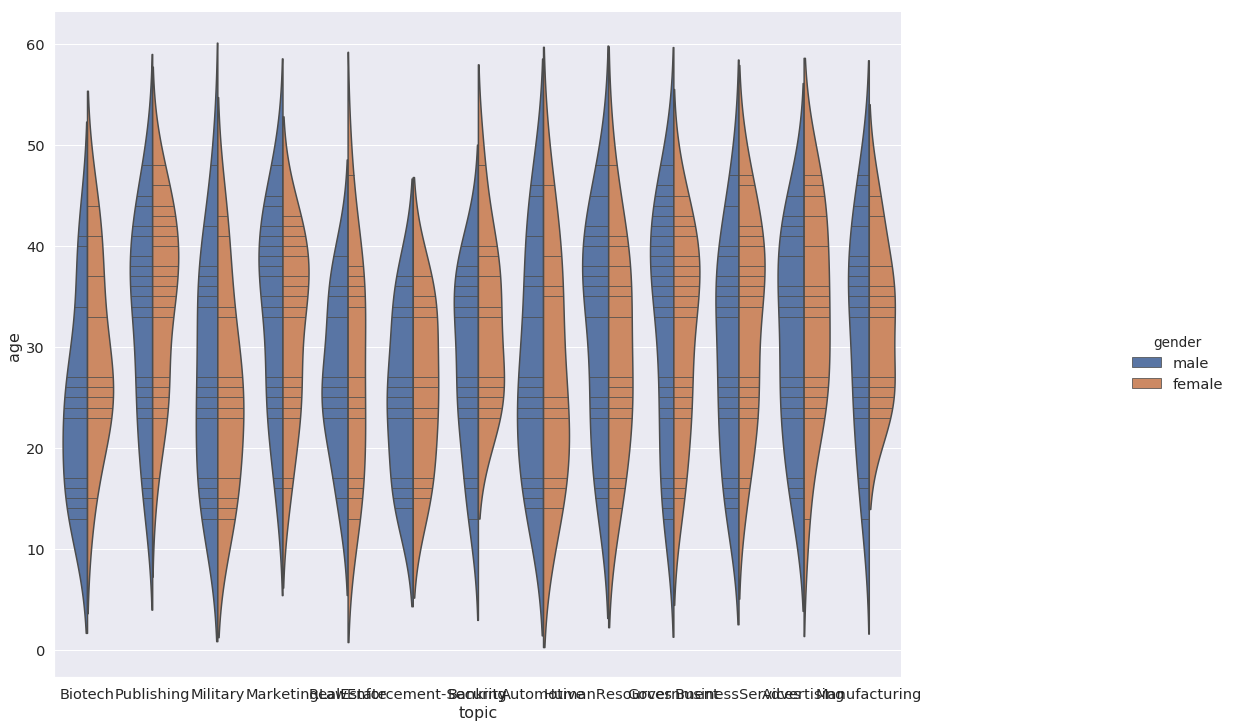

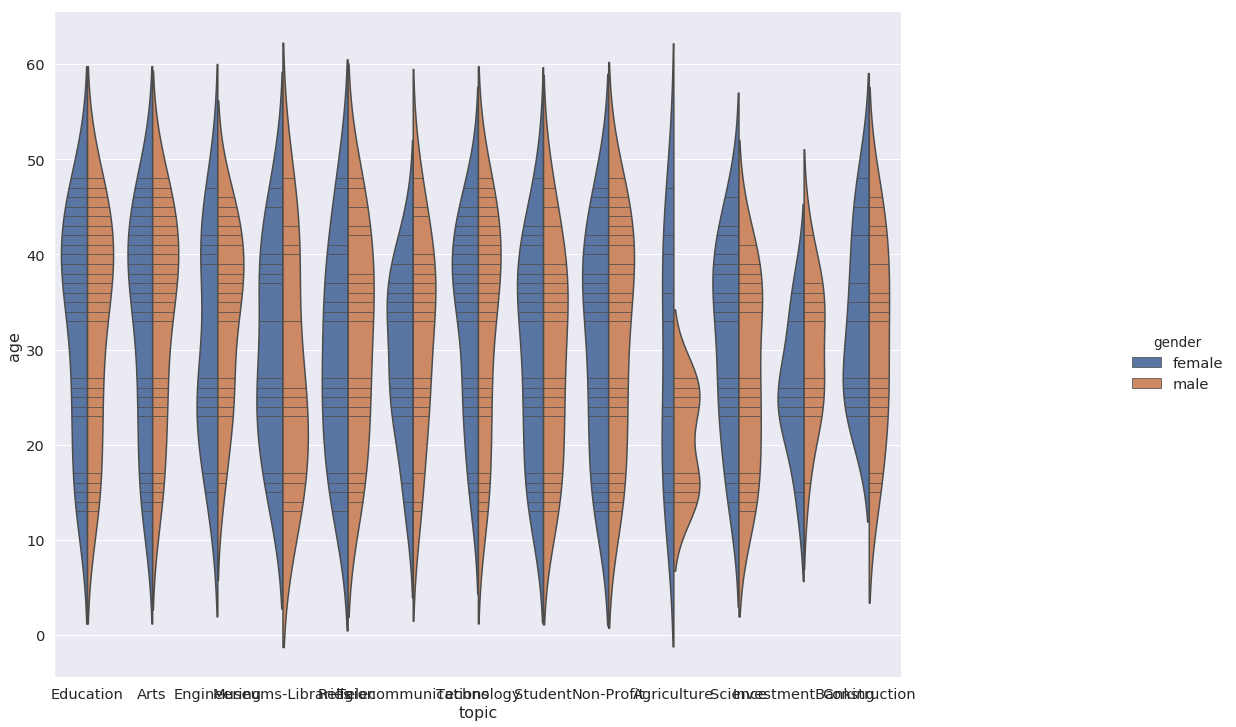

In [43]:
df = sf.groupby(['topic', 'gender', 'age'], {'people_count': agg.COUNT()}).to_dataframe()
temp_df = df
topics_list = []
total_length = len(df.topic.unique())
datasets = []
for i in range(3):
    cur_list = df.topic.unique()[:int(total_length/3)]
    topics_list.append(cur_list)
    datasets.append(df[df['topic'].apply(lambda x: x in cur_list)])
    df = temp_df[temp_df['topic'].apply(lambda x: x not in cur_list)]

for df in datasets:
    sns.catplot(x="topic", y="age", hue="gender",
                kind="violin", inner="stick", split=True,
                data=df, fontsize=18)
    plt.gcf().set_size_inches(20, 12)
    plt.show()

**Question 5:** Using the  [SJR Journal Ranking of 2017](https://www.scimagojr.com/journalrank.php) dataset and Seaborn, visualize
    the H-index distributions according to the SJR Best Quartile (15pt). Using a grid, visualize the _Cites / Doc. (2years)_ histograms values of each publisher (15pt).
    


In [25]:
sf = tc.SFrame.read_csv("datasets/scimagojr 2017.csv", delimiter=";")

Unexpected characters after last column. "21100457422"
Parse failed at token ending at: 
	Engineering (Q3); Ocean Engineering (Q3)"
13141;21100457422;^"PEPM 2016 - Proceedings of the 2016 ACM SIGPLAN
Successfully parsed 18 tokens: 
	0: 13140
	1: 63703
	2: Chuan Bo L ...  Mechanics
	3: journal
	4: 10077294
	5: 0,308
	6: Q3
	7: 15
	8: 161
	9: 490
	10: 2487
	11: 149
	12: 490
	13: 0,25
	14: 15,45
	15: China
	16: Chuan bo li xue
	17: Mechanical ... ering (Q3)

1 lines failed to parse correctly

Finished parsing file /home/ise/Desktop/datasets/scimagojr 2017.csv

Parsing completed. Parsed 100 lines in 0.338777 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,str,str,str,str,int,int,int,int,int,int,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "21100457422"
Parse failed at token ending at: 
	Engineering (Q3); Ocean Engineering (Q3)"
13141;21100457422;^"PEPM 2016 - Proceedings of the 2016 ACM SIGPLAN
Successfully parsed 18 tokens: 
	0: 13140
	1: 63703
	2: Chuan Bo L ...  Mechanics
	3: journal
	4: 10077294
	5: 0,308
	6: Q3
	7: 15
	8: 161
	9: 490
	10: 2487
	11: 149
	12: 490
	13: 0,25
	14: 15,45
	15: China
	16: Chuan bo l ... bian ji bu
	17: "Mechanica ... Q3)"
13141

1 lines failed to parse correctly

Finished parsing file /home/ise/Desktop/datasets/scimagojr 2017.csv

Parsing completed. Parsed 25358 lines in 0.218984 secs.

part 1 

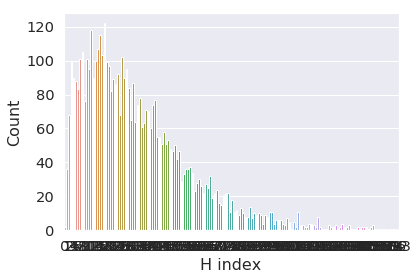

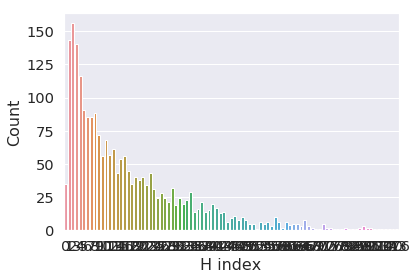

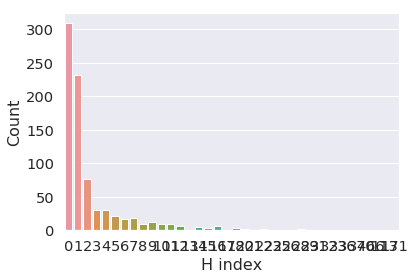

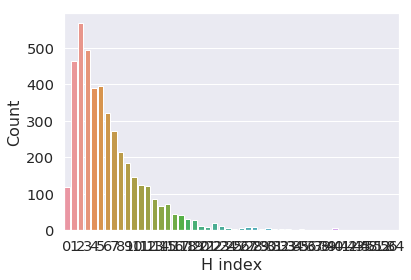

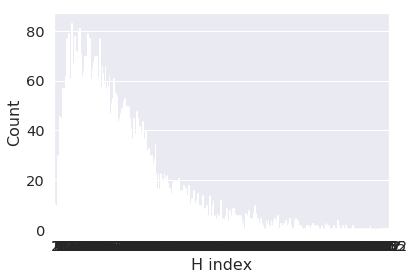

In [32]:
best_quartile = sf['SJR Best Quartile'].unique()
for value in best_quartile:
    sf2 = sf[sf['SJR Best Quartile'] == value]
    df = sf2.groupby('H index', {'Count': agg.COUNT()}).to_dataframe()
    ax = sns.barplot(x="H index", y="Count", data=df)
    plt.show()

part 2

In [34]:
def convert(string):
    try:
        return float(string.replace(",", "."))
    except:
        return 0

/home/ise/anaconda3/envs/venv/envs/bigdata/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ise/anaconda3/envs/venv/envs/bigdata/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


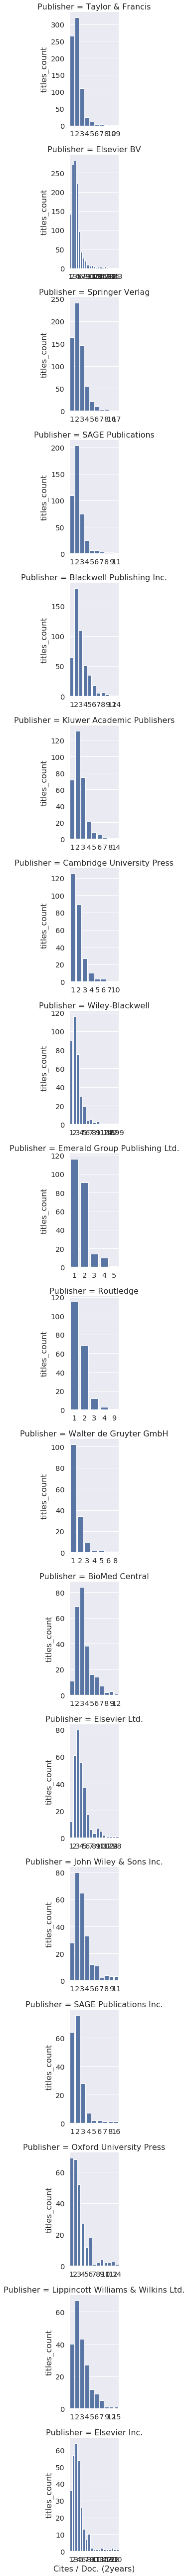

In [38]:
sf2 = sf['Title', 'Publisher', 'Cites / Doc. (2years)'] 
sf2["Cites / Doc. (2years)"] = sf2["Cites / Doc. (2years)"].apply(lambda s: convert(s)) 

g = sf2.groupby('Publisher', {'Count': agg.COUNT()}).sort("Count", ascending=False)
g2 = g[g['Count'] >= 150]
popular_publishers = list(g2['Publisher'])
publishers_length = len(popular_publishers)
sf2 = sf2[sf2['Publisher'].apply(lambda x: x in popular_publishers)]
sf2.materialize()
sf2['Cites / Doc. (2years)'] = sf2['Cites / Doc. (2years)'].apply(lambda x: int(x) + 1)
sf2.materialize()
titles_sf = sf2.groupby(['Publisher','Cites / Doc. (2years)'], {'titles_count': agg.COUNT()}).sort("titles_count", ascending=False)

df = titles_sf.to_dataframe()
g = sns.FacetGrid(df, row='Publisher', height=4, sharex=False, sharey=False)
g.map(sns.barplot, "Cites / Doc. (2years)", "titles_count")

plt.tight_layout()
plt.show()